<H1><U>Phase 1: Cross Matching Catalogs

Libraries Imported

In [380]:
import pandas as pd
import numpy as np
from astropy.io import fits,ascii
from astropy.coordinates import SkyCoord,Distance,Angle,match_coordinates_sky,match_coordinates_3d
import astropy.constants as const
from astropy.table import QTable,join,Table, join_skycoord
import astropy.units as u
from astropy.cosmology import default_cosmology
import astropy.cosmology.units as cu
from astropy.cosmology import WMAP9
from scipy import median,mean
import seaborn as sns 
cosmo = default_cosmology.get()

# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

TNS Survey Data containing TDE, TDE-H + He



In [412]:
#tns1 = pd.read_csv('tns_search_tde.csv')
#tns2 = pd.read_csv('tns_search_tde1.csv')
#tnshhe = pd.read_csv('tns_search_tdehhe.csv')
#tns_data = pd.concat([tns1,tns2,tnshhe])

tns_data = pd.read_csv('tns_search.csv')
tns_data = QTable.from_pandas(tns_data)
tns_data['Coordinates'] = SkyCoord(ra = tns_data["RA"], dec = tns_data["DEC"], unit = (u.hourangle,u.deg), distance = Distance(z = tns_data["Redshift"]))
#tns_data

c:\Users\Chinmay A\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2412: RuntimeWarning: invalid value encountered in _integral_comoving_distance_z1z2_scalar (vectorized)
  outputs = ufunc(*inputs)


In [413]:
tns_3d = tns_data['Name','RA','DEC','Redshift']
tns =tns_3d.to_pandas()

m =  mean(tns['Redshift'])
tns = tns.fillna(0)
tns = QTable.from_pandas(tns)
tns['Coordinates'] = SkyCoord(ra = tns["RA"], dec = tns["DEC"], unit = (u.hourangle,u.deg), distance = Distance(z = tns["Redshift"]))
tns

C:\Users\Chinmay A\AppData\Local\Temp\ipykernel_10664\609752389.py:4: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  m =  mean(tns['Redshift'])


Name,RA,DEC,Redshift,Coordinates
,,,,"deg,deg,Mpc"
str11,str12,str12,float64,SkyCoord
AT 2023cvb,19:14:25.680,+41:40:09.28,0.071,"288.60699999999997,41.669244444444445,331.27258563730373"
AT 2023clx,11:40:09.397,+15:19:38.54,0.0,"175.03915416666663,15.327372222222222,0.0"
AT 2022wtn,23:23:23.778,+10:41:07.99,0.049,"350.84907499999997,10.685552777777778,225.12256516171465"
AT 2022upj,00:23:56.846,-14:25:23.22,0.054,"5.986858333333332,-14.423116666666665,248.97704624809973"
AT 2022pna,01:41:55.550,-03:17:22.60,0.095,"25.481458333333332,-3.289611111111111,450.5313392993113"
AT 2022lri,02:20:08.009,-22:43:15.42,0.032,"35.03337083333333,-22.72095,145.22544591191556"
AT 2022ibq,17:50:35.785,+21:16:29.92,0.395,"267.6491041666666,21.274977777777778,2207.260616257759"
AT 2022hvp,09:54:45.240,+55:26:25.37,0.12,"148.68849999999998,55.44038055555555,578.4924249710162"


In [ ]:
tns_data

NSA Data of Galaxies

In [389]:
nsa_data = QTable.read('nsa_v0_1_2.fits')
nsa_data["Coordinates"] = SkyCoord(ra = nsa_data["RA"], dec = nsa_data["DEC"], unit = (u.deg,u.deg), distance = Distance(z = nsa_data["ZDIST"]))

Cross Matching the data


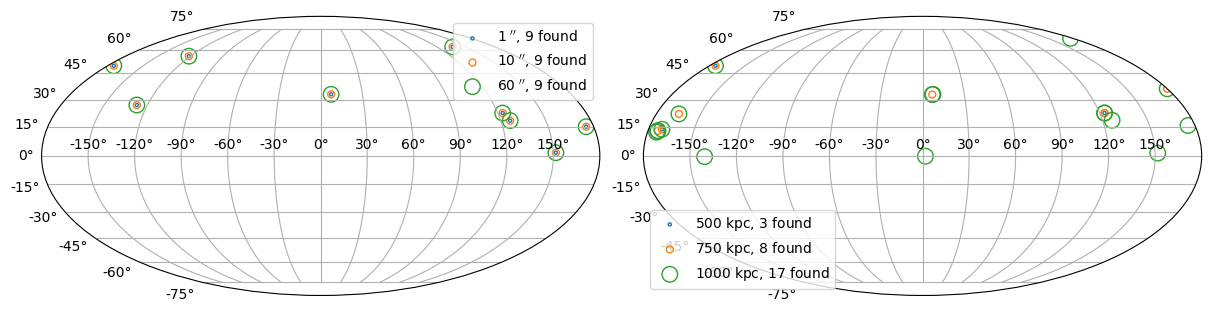

In [414]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12, 4), 
                             constrained_layout=True, 
                             subplot_kw={'projection': "mollweide"})

max_seps = [1, 10, 60] * u.arcsec
max_dists = [500,750,1000]*u.kpc
#2D Separation 
for i, max_sep in enumerate(max_seps):
    idx, d2d, d3d = nsa_data['Coordinates'].match_to_catalog_sky(tns['Coordinates'])
    sep_constraint = d2d < max_sep
    matches = nsa_data[sep_constraint]
    #print(len(matches))
    ra = Angle(matches['Coordinates'].ra).wrap_at(180*u.deg)
    dec = Angle(matches['Coordinates'].dec)
    ax1.scatter(ra.radian, dec.radian, 
                alpha=1, s=5 ** (i + 1),
                color='none', edgecolor=f"C{i}",
                label=f"{max_sep:latex_inline}, {len(matches)} found")
ax1.legend()
ax1.grid(True)
#3D Separation 
for i, max_dist  in enumerate(max_dists):
    idx,d2d,d3d = nsa_data['Coordinates'].match_to_catalog_3d(tns['Coordinates'])
    dist_constraint = d3d < max_dist
    matches = nsa_data[dist_constraint]
    ra = Angle(matches['Coordinates'].ra).wrap_at(180*u.deg)
    dec = Angle(matches['Coordinates'].dec)
    ax2.scatter(ra.radian, dec.radian, 
                alpha=1, s=5 ** (i + 1),
                color='none', edgecolor=f"C{i}",
                label=f"{max_dist:latex_inline}, {len(matches)} found")
ax2.legend()
ax2.grid(True)


In [ ]:
host_tab = join(tns_data, nsa_data, keys='Coordinates', join_funcs={'Coordinates': join_skycoord(1 * u.arcsec)})
host_tab.rename_columns(['Name', 'IAUNAME'], ['TDE Name', 'Galaxy Name'])
host_tab['TDE Name', 'Galaxy Name']

Plotting Sersic Index v/s Mass


In [77]:
masses = host_tab['MASS'] * u.Msun / cu.littleh ** 2
masses = np.log10(masses.to(u.Msun, cu.with_H0(cosmo.H0)).value)
sersic = host_tab['SERSIC_N']


In [ ]:
f, ax = plt.subplots()

ax.scatter(masses, sersic)

ax.set_xlim(8, 11)
ax.set_xlabel("$\log(M_*/M_\odot)$")
ax.set_ylabel("Galaxy Sersic Index")
#sns.jointplot(data= host_tab,x = masses,y = sersic)

<h1><U>Phase 2: Machine Learning

Libraries imported

In [429]:
import numpy as np
from numpy import random
import random
import pandas as pd
from astropy.table import Table
from astropy.coordinates import Distance, SkyCoord
import astropy.units as u
from astropy.cosmology import default_cosmology
from astropy.cosmology import WMAP9
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout
from tensorflow.keras.optimizers import Adam
cosmo = default_cosmology.get()

In [430]:
tns_data = pd.read_csv('tns_complete.csv',low_memory=False)
tns_data.columns

Index(['Object ID', 'Prefix Name', 'Name', 'RA', 'DEC', 'Redshift', 'TypeID',
       'Type', 'Reporting Group ID', 'Reporting Group', 'Source Group ID',
       'Source Group', 'Discovery Date', 'Discovery magnitude',
       'Discovery Magnitude Filter', 'Filter', 'Reporters', 'Time received',
       'Internal names', 'Creation Date', 'Last modified'],
      dtype='object')

In [444]:
tns_data.head()

,Object ID,Prefix Name,Name,RA,DEC,Redshift,TypeID,Type,Reporting Group ID,Reporting Group,...,Source Group,Discovery Date,Discovery magnitude,Discovery Magnitude Filter,Filter,Reporters,Time received,Internal names,Creation Date,Last modified
42,133447,SN,2023ohr,36.460547,45.315173,0.068,3.0,SN Ia,48.0,ZTF,...,ZTF,53:16.8,19.4300,111.0,r,C. Fremling (Caltech) on behalf of the Zwicky ...,7/31/2023 15:25,ZTF23aauubqu,7/31/2023 15:25,8/5/2023 9:30
48,133107,SN,2023nve,243.541664,38.357539,0.064,3.0,SN Ia,48.0,ZTF,...,ZTF,55:12.0,20.6400,110.0,g,C. Fremling (Caltech) on behalf of the Zwicky ...,7/24/2023 11:25,"ZTF23aaubzzz, ATLAS23pwd, PS23fxy",7/24/2023 11:25,8/5/2023 7:12
49,133092,SN,2023nup,310.253774,-22.580574,0.051,3.0,SN Ia,74.0,ALeRCE,...,ZTF,31:11.0,20.0359,110.0,g,"F. Forster, F.E. Bauer, G. Pignata, A. Munoz-A...",7/23/2023 22:52,"ZTF23aatvksz, ATLAS23pnr",7/23/2023 22:52,8/5/2023 18:44
51,132872,SN,2023nmj,18.815708,-3.744175,0.070,3.0,SN Ia,74.0,ALeRCE,...,ZTF,33:37.0,19.9876,110.0,g,"A. Munoz-Arancibia, G. Pignata, F.E. Bauer, F....",7/19/2023 20:18,"ZTF23aasyshb, ATLAS23pwi",7/19/2023 20:18,8/5/2023 18:58
52,132854,SN,2023nlr,228.063109,43.283928,0.041,3.0,SN Ia,48.0,ZTF,...,ZTF,19:40.8,19.9000,111.0,r,C. Fremling (Caltech) on behalf of the Zwicky ...,7/19/2023 7:23,"ZTF23aastndi, ATLAS23pfo",7/19/2023 7:24,8/5/2023 5:30


Separation of Classified and Unclassified Data

In [431]:
tns_data['Type'].isna().sum()
tns_data_unclassified = tns_data[tns_data['Type'].isna()]
tns_data = tns_data.dropna(subset=['Type'])
tns_data.isna().sum()
tns_data.Type.value_counts()

SN Ia                8390
SN II                1866
FRB                   850
CV                    457
SN IIn                367
SN Ia-91T-like        329
SN Ic                 266
SN Ib                 226
SN IIP                217
SN IIb                183
Varstar               131
SLSN-I                130
SN Ic-BL              118
AGN                   112
SN Ia-91bg-like       111
Other                  94
Nova                   71
SN Ia-pec              69
TDE                    68
SLSN-II                63
SN Ib/c                62
SN I                   53
SN Ibn                 50
SN                     47
Galaxy                 43
SN Iax[02cx-like]      33
SN Ia-CSM              25
LBV                    21
M dwarf                14
SN II-pec              13
QSO                    12
SN Ib-pec              12
SN Ib-Ca-rich           8
SN Icn                  6
ILRT                    5
LRN                     5
SN IIn-pec              5
SN Ia-SC                4
Impostor-SN 

Different CSVs for different types of objects and Data cleaning

In [432]:
types = tns_data['Type'].unique().tolist()
sn = []
tde = []
slsn = []
acv = ['AGN','CV','Varstar']
misc = []
good = []

for type in types:
        if 'SN' in type[0:2]:
                sn.append(type)
        if 'TDE' in type[0:3]:
                tde.append(type)
        if 'SLSN'in type:
                slsn.append(type)
for type in types:
        if type in sn:
                good.append(type)
        if type in tde:
                good.append(type)
        if type in slsn:
                good.append(type)
        if type in acv:
                good.append(type)
for type in types:
        if type not in good:
                misc.append(type)



sne_data = tns_data[tns_data.Type.isin(sn)]
slsn_data = tns_data[tns_data.Type.isin(slsn)]
tde_data = tns_data[tns_data.Type.isin(tde)]
agn_data = tns_data[tns_data['Type']=='AGN']
cv_data = tns_data[tns_data['Type'] == 'CV']
vs_data = tns_data[tns_data['Type'] == 'Varstar']
cf_data_dirty = tns_data[tns_data.Type.isin(good)]
misc_data_dirty = tns_data[tns_data.Type.isin(misc)]


In [433]:
srcgrp_tde = tde_data['Source Group'].unique()
tde_data['Time received'] = pd.to_datetime(tde_data['Time received'])
earliest_tde = tde_data['Time received'].min()
def data_clean(x):
    x = x[x['Source Group'].isin(srcgrp_tde)]
    x['Time received'] = pd.to_datetime(x['Time received'])
    x = x[x['Time received'] >= earliest_tde]
    return x
sne = data_clean(sne_data)
slsn= data_clean(slsn_data)
tde = data_clean(tde_data)
agn = data_clean(agn_data)
cv  = data_clean(cv_data)
vs  = data_clean(vs_data)
cf_data = data_clean(cf_data_dirty)
misc_data = data_clean(cf_data_dirty)

C:\Users\Chinmay A\AppData\Local\Temp\ipykernel_10664\2933360643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tde_data['Time received'] = pd.to_datetime(tde_data['Time received'])
C:\Users\Chinmay A\AppData\Local\Temp\ipykernel_10664\2933360643.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Time received'] = pd.to_datetime(x['Time received'])
C:\Users\Chinmay A\AppData\Local\Temp\ipykernel_10664\2933360643.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

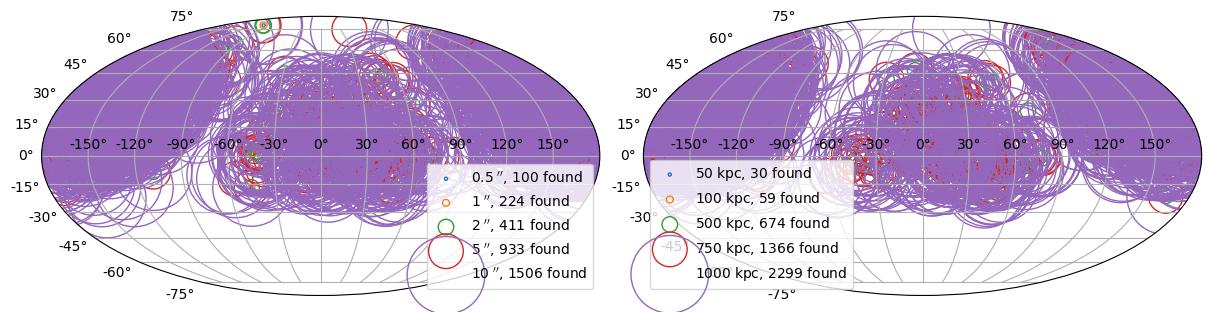

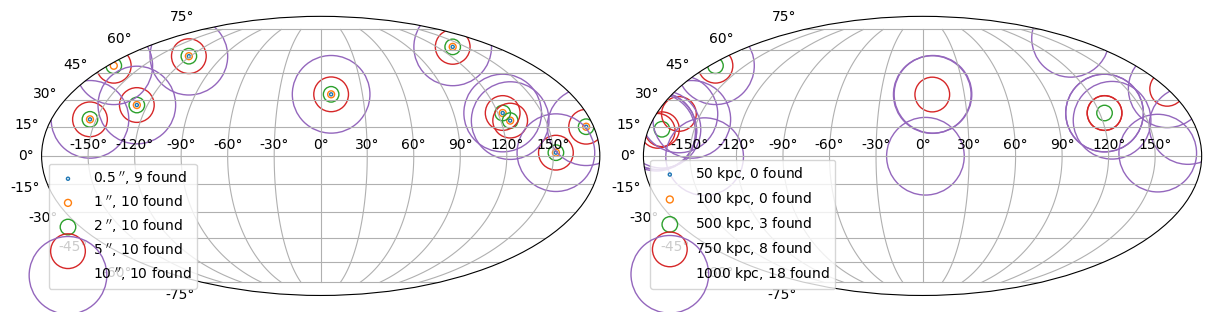

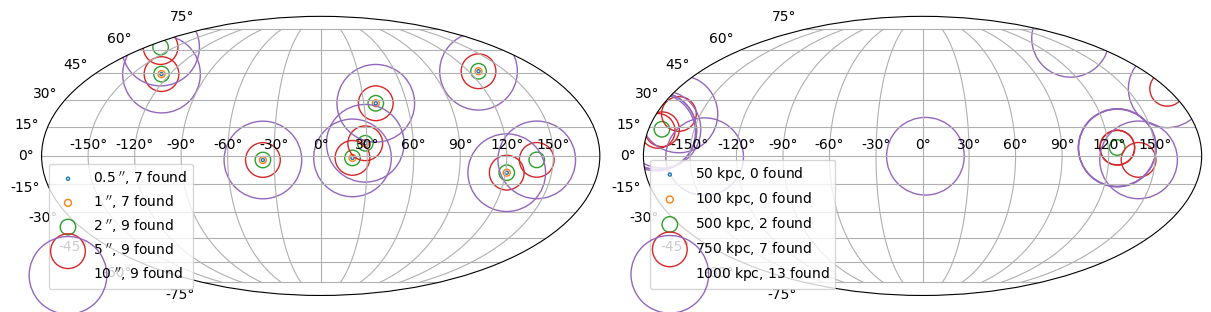

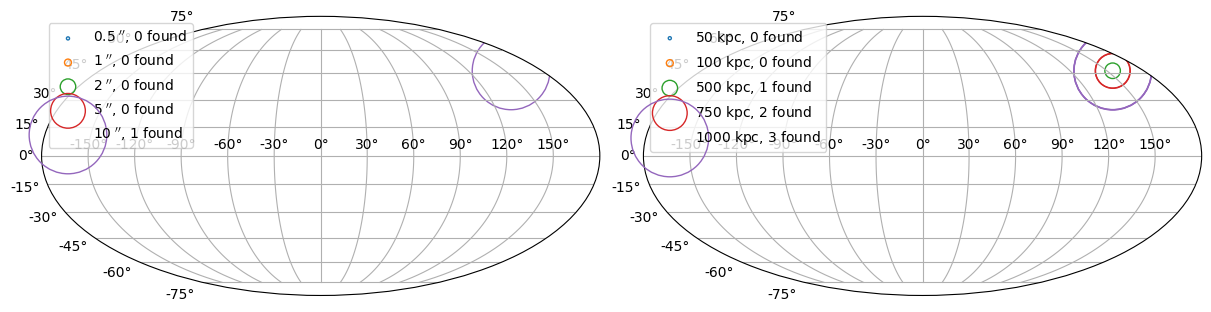

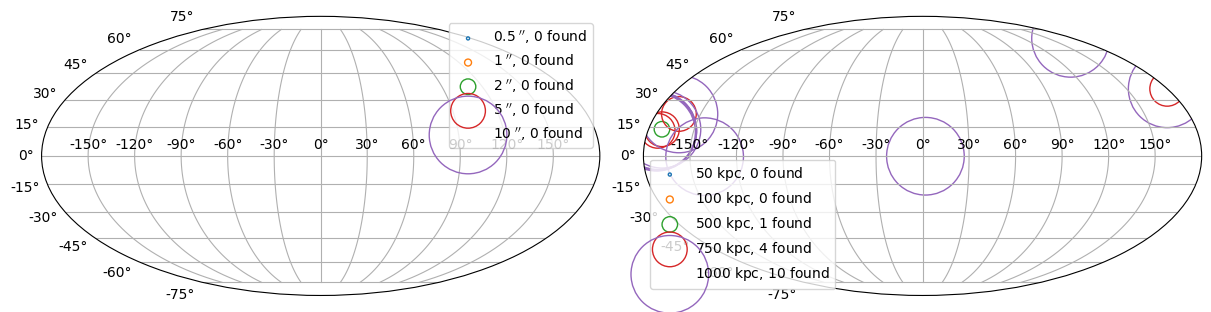

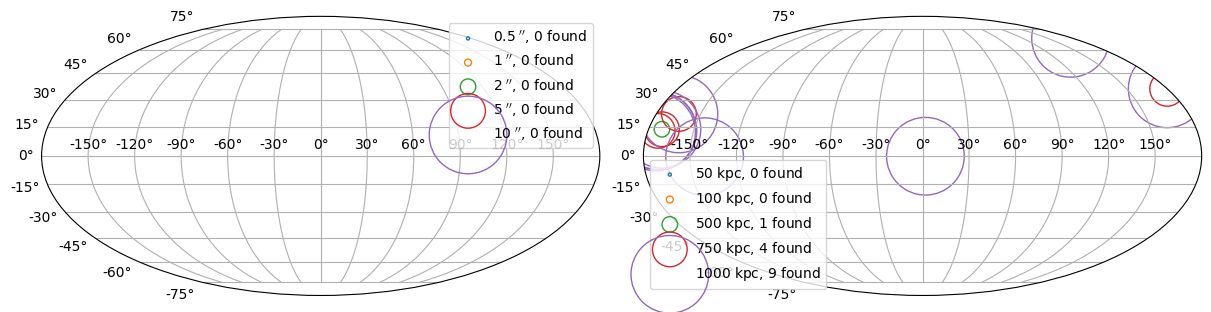

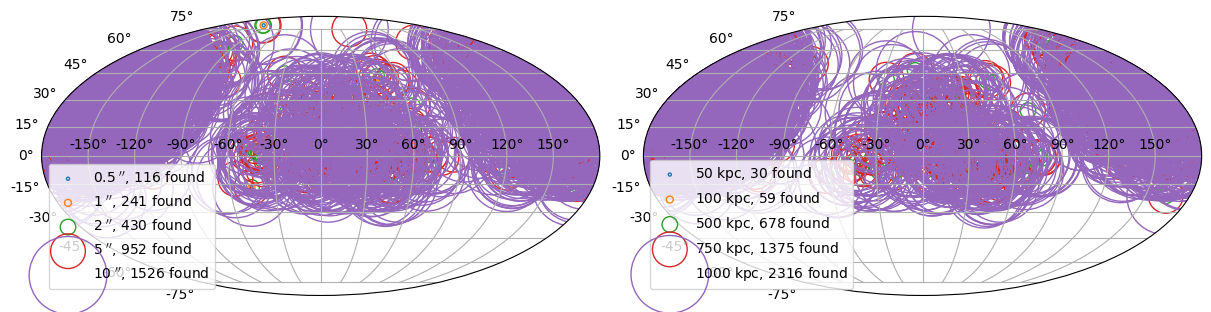

In [443]:
def cross_match(x):
    x['Redshift'] = x['Redshift'].fillna(0)
    x = QTable.from_pandas(x)
    x['Coordinates'] = SkyCoord(ra = x["RA"], dec = x["DEC"], unit = (u.deg,u.deg), distance = Distance(z = x["Redshift"]))
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12, 4), 
                             constrained_layout=True, 
                             subplot_kw={'projection': "mollweide"})

    max_seps = [0.5,1,2,5,10] * u.arcsec
    max_dists = [50,100,500,750,1000]*u.kpc
        #2D Separation 
    for i, max_sep in enumerate(max_seps):
        idx, d2d, d3d = nsa_data['Coordinates'].match_to_catalog_sky(x['Coordinates'])
        sep_constraint = d2d < max_sep
        matches = nsa_data[sep_constraint]
        #print(len(matches))
        ra = Angle(matches['Coordinates'].ra).wrap_at(180*u.deg)
        dec = Angle(matches['Coordinates'].dec)
        ax1.scatter(ra.radian, dec.radian, 
                alpha=1, s=5 ** (i + 1),
                color='none', edgecolor=f"C{i}",
                label=f"{max_sep:latex_inline}, {len(matches)} found")
    
    ax1.legend()
    ax1.grid(True)
#3D Separation 
    for i, max_dist  in enumerate(max_dists):
        idx,d2d,d3d = nsa_data['Coordinates'].match_to_catalog_3d(x['Coordinates'])
        dist_constraint = d3d < max_dist
        matches = nsa_data[dist_constraint]
        ra = Angle(matches['Coordinates'].ra).wrap_at(180*u.deg)
        dec = Angle(matches['Coordinates'].dec)
        ax2.scatter(ra.radian, dec.radian, 
                    alpha=1, s=5 ** (i + 1),
                    color='none', edgecolor=f"C{i}",
                    label=f"{max_dist:latex_inline}, {len(matches)} found")
    ax2.legend()
    ax2.grid(True)
cross_match(sne)
cross_match(tde)
cross_match(agn)
cross_match(slsn)
cross_match(cv)
cross_match(vs)
cross_match(cf_data)
cross_match(misc_data)

Retrieval of photometric data

In [366]:
#TNS                 = "www.wis-tns.org"
TNS                 = "sandbox.wis-tns.org"
url_tns_api         = "https://" + TNS + "/api/get"

TNS_BOT_ID          = "YOUR_BOT_ID_HERE"
TNS_BOT_NAME        = "YOUR_BOT_NAME_HERE"
TNS_API_KEY         = "3204"

# list that represents json file for search obj
search_obj          = [("ra", ""), ("dec", ""), ("radius", ""), ("units", ""), ("objname", ""), 
                       ("objname_exact_match", 0), ("internal_name", ""), 
                       ("internal_name_exact_match", 0), ("objid", ""), ("public_timestamp", "")]

# list that represents json file for get obj
get_obj             = [("objname", ""), ("objid", ""), ("photometry", "0"), ("spectra", "1")]

# file url (for downloading file from TNS)
file_tns_url        = "Here put url of a file you want to download from TNS." 

# current working directory
cwd                 = os.getcwd()
# directory for downloaded files
download_dir        = os.path.join(cwd, "downloaded_files")

# external http errors
ext_http_errors     = [403, 500, 503]
err_msg             = ["Forbidden", "Internal Server Error: Something is broken", "Service Unavailable"]


def set_bot_tns_marker():
    tns_marker = 'tns_marker{"tns_id":3204,"type": "user", "name":"Chinmay Ambasht"}'
    
    return tns_marker

def format_to_json(source):
    parsed = json.loads(source, object_pairs_hook = OrderedDict)
    result = json.dumps(parsed, indent = 4)
    return result

def is_string_json(string):
    try:
        json_object = json.loads(string)
    except Exception:
        return False
    return json_object

def print_status_code(response):
    json_string = is_string_json(response.text)
    if json_string != False:
        print ("status code ---> [ " + str(json_string['id_code']) + " - '" + json_string['id_message'] + "' ]\n")
    else:
        status_code = response.status_code
        if status_code == 200:
            status_msg = 'OK'
        elif status_code in ext_http_errors:
            status_msg = err_msg[ext_http_errors.index(status_code)]
        else:
            status_msg = 'Undocumented error'
        print ("status code ---> [ " + str(status_code) + " - '" + status_msg + "' ]\n")

def search():
    search_url = url_tns_api + "/search"
    tns_marker = set_bot_tns_marker()
    headers = {'User-Agent': tns_marker}
    json_file = OrderedDict(search_obj)
    search_data = {'api_key': TNS_API_KEY, 'data': json.dumps(json_file)}
    response = requests.post(search_url, headers = headers, data = search_data)
    return response

def get():
    get_url = url_tns_api + "/object"
    tns_marker = set_bot_tns_marker()
    headers = {'User-Agent': tns_marker}
    json_file = OrderedDict(get_obj)
    get_data = {'api_key': TNS_API_KEY, 'data': json.dumps(json_file)}
    response = requests.post(get_url, headers = headers, data = get_data)
    return response

def get_file():
    filename = os.path.basename(file_tns_url)
    tns_marker = set_bot_tns_marker()
    headers = {'User-Agent': tns_marker}
    api_data = {'api_key': TNS_API_KEY}
    print ("Downloading file '" + filename + "' from the TNS...\n")
    response = requests.post(file_tns_url, headers = headers, data = api_data, stream = True)    
    print_status_code(response)
    path = os.path.join(download_dir, filename)
    if response.status_code == 200:
        with open(path, 'wb') as f:
            for chunk in response:
                f.write(chunk)
        print ("File was successfully downloaded.\n")
    else:
        print ("File was not downloaded.\n")

def print_response(response, json_file, counter):
    response_code = str(response.status_code) if json_file == False else str(json_file['id_code'])
    stats = 'Test #' + str(counter) + '| return code: ' + response_code + \
            ' | Total Rate-Limit: ' + str(response.headers.get('x-rate-limit-limit')) + \
            ' | Remaining: ' + str(response.headers.get('x-rate-limit-remaining')) + \
            ' | Reset: ' + str(response.headers.get('x-rate-limit-reset'))
    if(response.headers.get('x-cone-rate-limit-limit') != None):
        stats += ' || Cone Rate-Limit: ' + str(response.headers.get('x-cone-rate-limit-limit')) + \
                 ' | Cone Remaining: ' + str(response.headers.get('x-cone-rate-limit-remaining')) + \
                 ' | Cone Reset: ' + str(response.headers.get('x-cone-rate-limit-reset'))
    print (stats)

def get_reset_time(response):
    # If any of the '...-remaining' values is zero, return the reset time
    for name in response.headers:
        value = response.headers.get(name)
        if name.endswith('-remaining') and value == '0':
            return int(response.headers.get(name.replace('remaining', 'reset')))
    return None

def rate_limit_handling():
    counter = 0
    while True:
        counter = counter + 1
        response = search()
        json_file = is_string_json(response.text)
        print_response(response, json_file, counter)
        # Checking if rate-limit reached (...-remaining = 0)
        reset = get_reset_time(response)
        # A general verification if not some error 
        if (response.status_code == 200):
            if reset != None:
                # Sleeping for reset + 1 sec
                print("Sleep for " + str(reset + 1) + " sec") 
                time.sleep(reset + 1)
        	    # Can continue to submit requests...
                print ("Continue to submit requests...")
                for i in range(3):
                    counter = counter + 1
                    response = search()
                    json_file = is_string_json(response.text)
                    print_response(response, json_file, counter)
                print ("etc...\n") 
                break
        else:
            print_status_code(response)       
            break



In [367]:
get_obj             = [("objname", "2017A"), ("objid", ""), ("photometry", "1"), ("spectra", "1")]
response = get()
json_data = format_to_json(response.text)
print (json_data)

{
    "id_code": 401,
    "id_message": "Unauthorized"
}
